In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Bet_times_menos_6.5.csv')
df.head()

,Temporada,home_team_api_id,away_team_api_id,B365H,B365A,date,home_team_goal,away_team_goal,odd_team_win,Team_win
0,2008/2009,9984,8635,2.38,2.75,2008-08-16 00:00:00,0,3,2.75,1
1,2008/2009,9991,9998,1.44,7.50,2008-08-17 00:00:00,5,0,1.44,1
2,2008/2009,7947,9985,5.00,1.65,2008-08-16 00:00:00,1,3,1.65,1
3,2008/2009,9985,9986,1.30,9.50,2008-10-31 00:00:00,1,2,1.30,0
4,2008/2009,10000,9991,2.60,2.50,2008-11-02 00:00:00,0,2,2.50,1


In [ ]:
def resultado(df):
    if df['Team_win'] == 0:
        return -100
    else:
        return (df['odd_team_win']*100 -100)

df['Resultado'] = df.apply(resultado, axis = 1)
df.head()


,Temporada,home_team_api_id,away_team_api_id,B365H,B365A,date,home_team_goal,away_team_goal,odd_team_win,Team_win,Resultado
0,2008/2009,9984,8635,2.38,2.75,2008-08-16 00:00:00,0,3,2.75,1,175.0
1,2008/2009,9991,9998,1.44,7.50,2008-08-17 00:00:00,5,0,1.44,1,44.0
2,2008/2009,7947,9985,5.00,1.65,2008-08-16 00:00:00,1,3,1.65,1,65.0
3,2008/2009,9985,9986,1.30,9.50,2008-10-31 00:00:00,1,2,1.30,0,-100.0
4,2008/2009,10000,9991,2.60,2.50,2008-11-02 00:00:00,0,2,2.50,1,150.0


In [ ]:
df['count'] = 1
df = df[['Team_win','odd_team_win','count','Resultado']].groupby('odd_team_win')[['Resultado','count']].sum()


In [ ]:
df.reset_index()

,odd_team_win,Resultado,count
0,1.04,20.0,5
1,1.05,95.0,19
2,1.06,44.0,25
3,1.07,-130.0,12
4,1.08,304.0,38
...,...,...,...
85,4.75,-25.0,5
86,5.00,-200.0,2
87,5.25,-100.0,1
88,5.50,450.0,1


In [ ]:
df['prob_odd'] = df['count']/(df['count'].sum())


In [ ]:

import numpy as np

dist_original = (df['Resultado'])
size_output = len(dist_original)
prob_odd = (df['prob_odd'])

<Axes: xlabel='Resultado', ylabel='Density'>

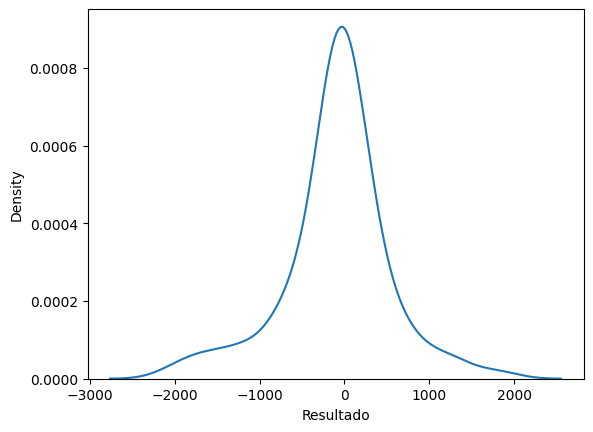

In [ ]:
import seaborn as sns
sns.kdeplot(data=df, x="Resultado")

In [ ]:
#Ho 50% of the times we get profit
#Ha 50% of the times we don't get get profit
Ho = 0.51
profit_pct = len(df['Resultado'].loc[df['Resultado'] > 0])/len(df)
df['y_n'] = 0



In [ ]:
a = -1
for i in df['Resultado']:
  a = a +1
  if i > 0 :
    df['y_n'][a] = 1
  else:
    df['y_n'][a] = 0

dist_means =[]
for i in range (1000):
  mean = np.mean(df['y_n'].sample(frac=1, replace = True))
  dist_means.append(mean)


df.head()



<ipython-input-157-200e6da6a21c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_n'][a] = 1
<ipython-input-157-200e6da6a21c>:5: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  df['y_n'][a] = 1
<ipython-input-157-200e6da6a21c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_n'][a] = 0
<ipython-input-157-200e6da6a21c>:7: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Ind

,Resultado,count,prob_odd,y_n
odd_team_win,,,,
1.04,20.0,5,0.001081,1
1.05,95.0,19,0.004106,1
1.06,44.0,25,0.005403,0
1.07,-130.0,12,0.002593,0
1.08,304.0,38,0.008213,0


In [ ]:
z_value = (Ho - profit_pct)/(np.std(dist_means))
z_value

1.7519051871901143

In [ ]:
from scipy.stats import norm
(1 - norm.cdf(z_value))

0.03989505623467515